<a href="https://colab.research.google.com/github/davidcamilo0710/QATAR_2022_Prediction/blob/master/Modeling%2BTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INDEX
- GROUP STAGE MODELING
  - Choosing the model
  - XGB Boost - Tuning & Hold-out Validation
  - Creating a pipeline for the XGB model
- KNOCKOUT STAGE MODELING
  - Choosing a model for the Knockout Stage
  - Random Forest - Tuning & Hold-out Validation
  - XGB Boost - Tuning & Hold-out Validation
  - Creating a pipeline for the XGB Boost model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
final_df = pd.read_csv('/content/drive/MyDrive/BigData/Data/training.csv')
final_df.tail()

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
8828,Nigeria,Zimbabwe,42,110,2,76.0,50.0,75.0,76.0,77.0,63.0,72.0,72.0
8829,Senegal,Zimbabwe,85,75,1,73.0,50.0,78.0,80.0,77.0,63.0,69.0,64.0
8830,Senegal,Zimbabwe,33,103,1,72.0,50.0,79.0,78.0,78.0,63.0,66.0,64.0
8831,Senegal,Zimbabwe,22,107,1,79.0,50.0,79.0,81.0,79.0,63.0,68.0,73.0
8832,Senegal,Zimbabwe,20,121,1,83.0,50.0,79.0,81.0,79.0,65.0,72.0,64.0


# GROUP STAGE MODELING

### Choosing a model

In [ ]:
# I save the original data frame in a flag to then train the final pipeline
pipe_DF = final_df
# Dummies for categorical columns
final_df = pd.get_dummies(final_df)

Making the training, testing and validation datasets

In [ ]:
X = final_df.drop('Team1_Result',axis=1)
y = final_df['Team1_Result']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

 Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_hold_test = scaler.transform(X_hold_test)

Defining function to display the confusion matrix quickly.

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

* **Random Forest**

              precision    recall  f1-score   support

           0       0.53      0.54      0.54       137
           1       0.67      0.77      0.72       216
           2       0.20      0.12      0.15        89

    accuracy                           0.57       442
   macro avg       0.47      0.48      0.47       442
weighted avg       0.53      0.57      0.55       442



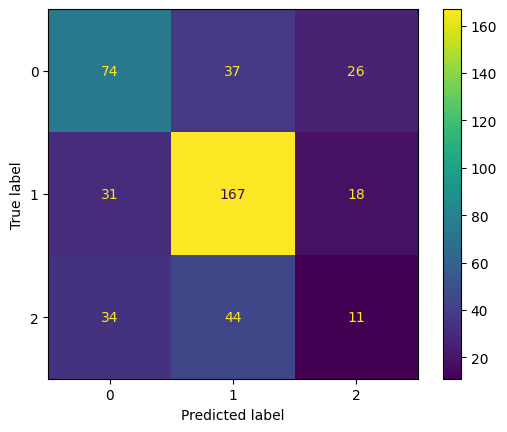

In [ ]:
from sklearn.ensemble import RandomForestClassifier
metrics_display(RandomForestClassifier())

* **Ada Boost Classifier**

              precision    recall  f1-score   support

           0       0.55      0.57      0.56       137
           1       0.62      0.85      0.72       216
           2       0.25      0.01      0.02        89

    accuracy                           0.60       442
   macro avg       0.47      0.48      0.43       442
weighted avg       0.52      0.60      0.53       442



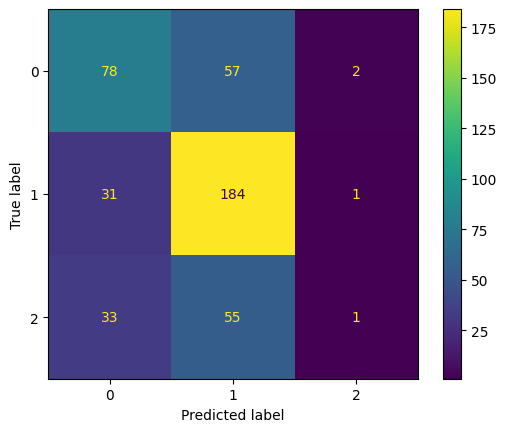

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
metrics_display(AdaBoostClassifier())

* **XGB Boost**

              precision    recall  f1-score   support

           0       0.51      0.55      0.53       137
           1       0.64      0.77      0.70       216
           2       0.18      0.07      0.10        89

    accuracy                           0.56       442
   macro avg       0.44      0.46      0.44       442
weighted avg       0.51      0.56      0.53       442



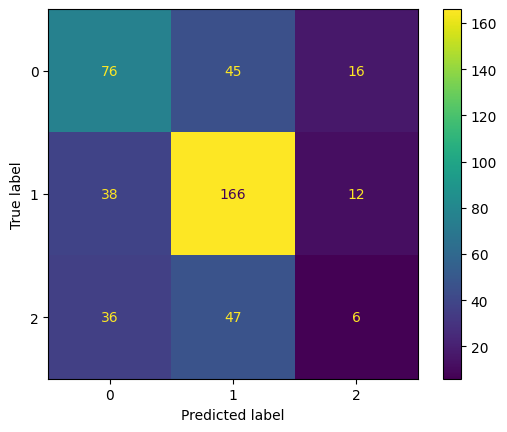

In [ ]:
# !pip install xgboost

from xgboost import XGBClassifier
metrics_display(XGBClassifier(use_label_encoder=False))

* **Neural network**



In [ ]:
import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras import Input

X_train.shape

(7949, 382)

Epoch 1/10
199/199 [==============================] - 2s 4ms/step - loss: 0.9964 - accuracy: 0.5307 - val_loss: 0.8828 - val_accuracy: 0.5893
Epoch 2/10
199/199 [==============================] - 1s 4ms/step - loss: 0.8861 - accuracy: 0.5971 - val_loss: 0.8850 - val_accuracy: 0.6006
Epoch 3/10
199/199 [==============================] - 1s 4ms/step - loss: 0.8613 - accuracy: 0.6084 - val_loss: 0.8877 - val_accuracy: 0.5975
Epoch 4/10
199/199 [==============================] - 1s 4ms/step - loss: 0.8506 - accuracy: 0.6133 - val_loss: 0.8887 - val_accuracy: 0.5956
Epoch 5/10
199/199 [==============================] - 1s 4ms/step - loss: 0.8379 - accuracy: 0.6168 - val_loss: 0.8894 - val_accuracy: 0.5918
Epoch 6/10
199/199 [==============================] - 1s 4ms/step - loss: 0.8269 - accuracy: 0.6209 - val_loss: 0.9023 - val_accuracy: 0.5881
Epoch 7/10
199/199 [==============================] - 1s 4ms/step - loss: 0.8129 - accuracy: 0.6259 - val_loss: 0.9102 - val_accuracy: 0.5918
Epoch 

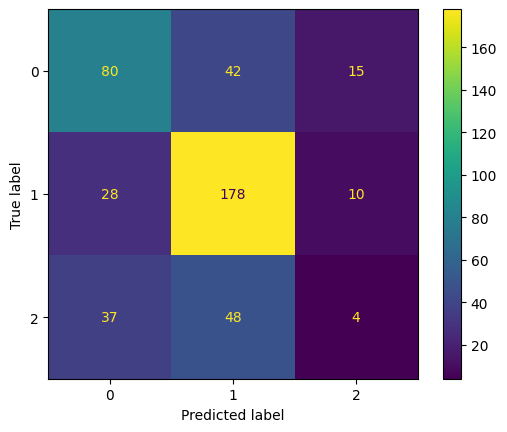

In [ ]:
model = Sequential()
model.add(Input(shape=(382,)))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

y_pred1 = model.predict(X_test)
y_pred1 = np.argmax(y_pred1,axis=1)
print(classification_report(y_test,y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)

- We observed that the XGBoost model outperforms the others in our analysis.
Therefore, we'll focus on tuning its hyperparameters to further improve its performance.
- After tuning, we'll evaluate its performance based on the validation dataset to ensure its effectiveness in predicting World Cup matches.

### XGB Boost - Tuning & Hold-out Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Make a dictionary of hyperparameter values to search
search_space = {
    "n_estimators" : [200,250,300,350,400,450,500],
    "max_depth" : [3,4,5,6,7,8,9],
    "gamma" : [0.001,0.01,0.1],
    "learning_rate" : [0.001,0.01,0.1]
}

In [ ]:
# make a GridSearchCV object
GS = GridSearchCV(estimator = XGBClassifier(use_label_encoder=False),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 3,
                  verbose = 4)

- We'll uncomment the following line to enable the tuning.
- The best result we found was:
  gamma = 0.01
  learning_rate = 0.01
  n_estimators = 300
  max_depth = 4

In [ ]:
# GS.fit(X_train,y_train)

To get only the best hyperparameter values

In [ ]:
# print(GS.best_params_)

- Initially, we validate the model with its default parameters.
- Then, we validate it with its tuned parameters.

* **Default Hyperparameters**

              precision    recall  f1-score   support

           0       0.53      0.50      0.52       146
           1       0.66      0.81      0.73       216
           2       0.22      0.11      0.15        80

    accuracy                           0.58       442
   macro avg       0.47      0.47      0.46       442
weighted avg       0.54      0.58      0.55       442



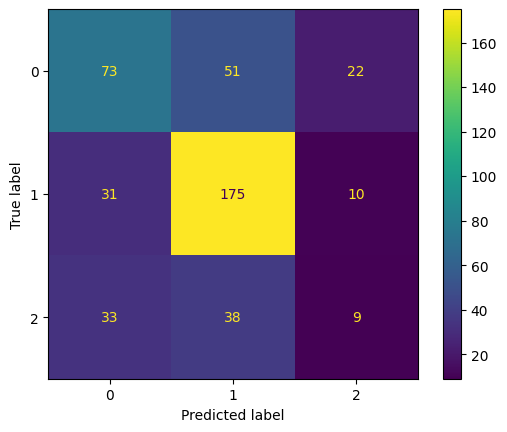

In [ ]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

* **Tuned Hyperparameters**

              precision    recall  f1-score   support

           0       0.63      0.66      0.64       146
           1       0.66      0.87      0.75       216
           2       0.33      0.03      0.05        80

    accuracy                           0.65       442
   macro avg       0.54      0.52      0.48       442
weighted avg       0.59      0.65      0.59       442



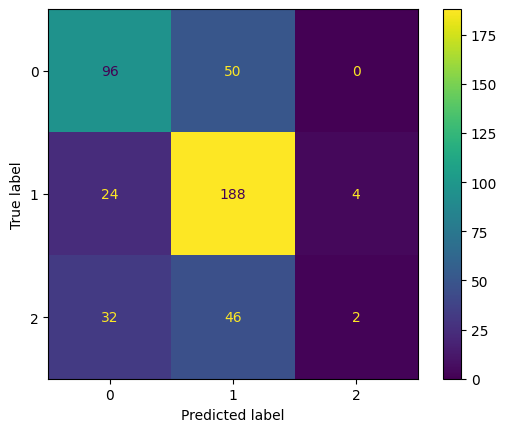

In [ ]:
model = XGBClassifier(use_label_encoder = False, gamma = 0.01, learning_rate = 0.01, n_estimators = 300, max_depth = 4)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

- We noticed a slight improvement in the model.
- So, we'll create a pipeline to easily use the model later.

### Creating a pipeline for the XGB model

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(),['Team1', 'Team2']),remainder='passthrough')

pipe_X = pipe_DF.drop('Team1_Result',axis=1)
pipe_y = pipe_DF['Team1_Result']

from sklearn.pipeline import make_pipeline
pipe_League = make_pipeline(column_trans,StandardScaler(with_mean=False),XGBClassifier(use_label_encoder=False, gamma= 0.01, learning_rate= 0.01, n_estimators= 300, max_depth= 4))
pipe_League.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=No...
                               feature_types=None, gamma=0.01, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
import joblib
joblib.dump(pipe_League,"/content/drive/MyDrive/BigData/groups_stage_prediction.pkl")

['/content/drive/MyDrive/BigData/groups_stage_prediction.pkl']

# KNOCKOUT STAGE MODELING

### Choosing the model

Removing Draw status.

In [ ]:
knock_df = pipe_DF[pipe_DF['Team1_Result'] != 2]

In [ ]:
pipe_knock_df = knock_df
knock_df = pd.get_dummies(knock_df)
X = knock_df.drop('Team1_Result',axis=1)
y = knock_df['Team1_Result']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

* **Ada Boost Classifier**

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       256
           1       0.80      0.85      0.82       431

    accuracy                           0.77       687
   macro avg       0.75      0.74      0.75       687
weighted avg       0.77      0.77      0.77       687



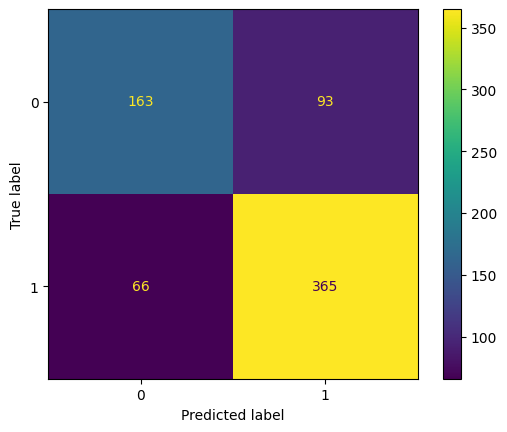

In [ ]:
metrics_display(AdaBoostClassifier())

*   **Random Forest**




              precision    recall  f1-score   support

           0       0.68      0.65      0.67       256
           1       0.80      0.82      0.81       431

    accuracy                           0.76       687
   macro avg       0.74      0.74      0.74       687
weighted avg       0.76      0.76      0.76       687



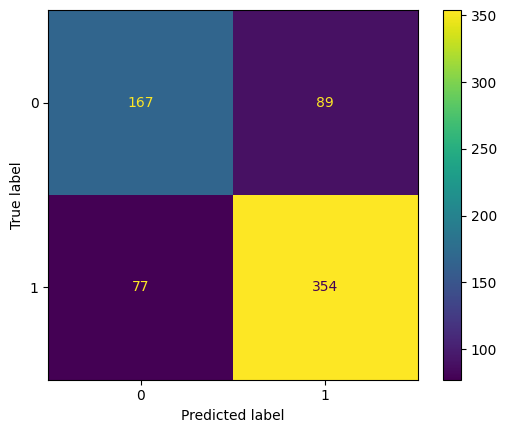

In [ ]:
metrics_display(RandomForestClassifier())

* **XGB Boost**

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       256
           1       0.81      0.81      0.81       431

    accuracy                           0.76       687
   macro avg       0.74      0.74      0.74       687
weighted avg       0.76      0.76      0.76       687



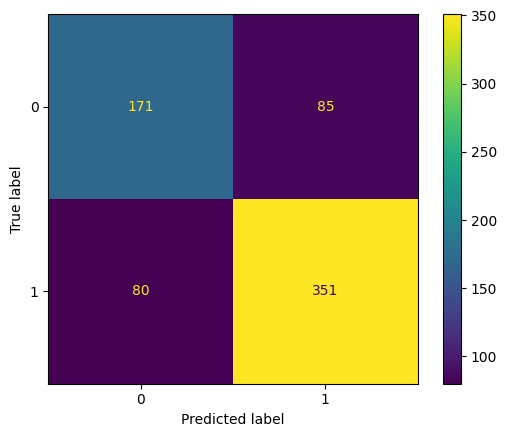

In [ ]:
metrics_display(XGBClassifier(use_label_encoder=False))

* **Neural network**

In [ ]:
X_train.shape

(5490, 381)

Epoch 1/10
138/138 [==============================] - 3s 10ms/step - loss: 1.1680 - accuracy: 0.6553 - val_loss: 0.5591 - val_accuracy: 0.7259
Epoch 2/10
138/138 [==============================] - 1s 9ms/step - loss: 0.5643 - accuracy: 0.7086 - val_loss: 0.5222 - val_accuracy: 0.7541
Epoch 3/10
138/138 [==============================] - 1s 9ms/step - loss: 0.5317 - accuracy: 0.7332 - val_loss: 0.5060 - val_accuracy: 0.7796
Epoch 4/10
138/138 [==============================] - 1s 7ms/step - loss: 0.5198 - accuracy: 0.7445 - val_loss: 0.4746 - val_accuracy: 0.7787
Epoch 5/10
138/138 [==============================] - 0s 3ms/step - loss: 0.5019 - accuracy: 0.7507 - val_loss: 0.4716 - val_accuracy: 0.7814
Epoch 6/10
138/138 [==============================] - 0s 3ms/step - loss: 0.5035 - accuracy: 0.7500 - val_loss: 0.4799 - val_accuracy: 0.7541
Epoch 7/10
138/138 [==============================] - 1s 4ms/step - loss: 0.5008 - accuracy: 0.7507 - val_loss: 0.4678 - val_accuracy: 0.7869
Epoch

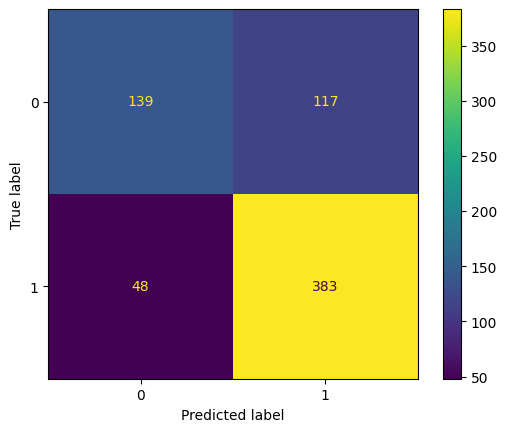

In [ ]:
model = Sequential()
model.add(Input(shape=(381,)))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
X_train = X_train.astype('float32')
y_train = y_train.astype('int')
model.fit(X_train,y_train,epochs=10,validation_split=0.2)
X_test = X_test.astype('float32')
y_pred1 = model.predict(X_test)
y_pred1 = np.argmax(y_pred1,axis=1)
print(classification_report(y_test,y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)

- We observed that all models have very similar performance.
- Therefore, we will tune both the Random Forest model and the XGBoost model.

### Random Forest - Tuning & Hold-out Validation

In [ ]:
search_space = {
    "max_depth" : [11,12,13,14,15,16],
    "max_leaf_nodes" : [170,180,190,200,210,220,230],
    "min_samples_leaf" : [3,4,5,6,7,8],
    "n_estimators" : [310,320,330,340,350]
}

In [ ]:
GS = GridSearchCV(estimator = RandomForestClassifier(),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 3,
                  verbose = 4)

- We'll uncomment the following lines to enable the tuning.
- The best result we found was:
  max_depth = 16
  n_estimators = 320
  max_leaf_nodes = 190
  min_samples_leaf = 5

In [ ]:
#GS.fit(X_train,y_train)

In [ ]:
#print(GS.best_params_)

* **Default Hyperparameters**

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       262
           1       0.82      0.87      0.85       424

    accuracy                           0.80       686
   macro avg       0.79      0.78      0.79       686
weighted avg       0.80      0.80      0.80       686



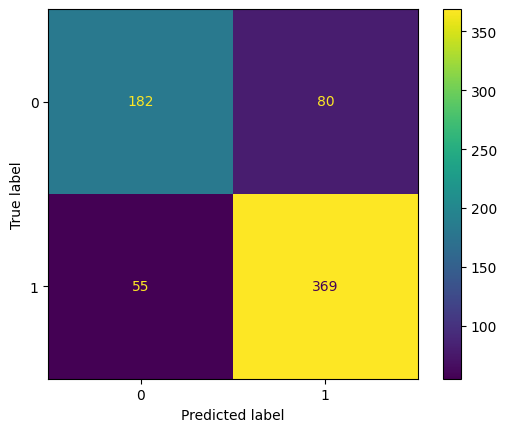

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

* **Tuned Hyperparameters**

              precision    recall  f1-score   support

           0       0.79      0.67      0.72       262
           1       0.81      0.89      0.85       424

    accuracy                           0.81       686
   macro avg       0.80      0.78      0.79       686
weighted avg       0.80      0.81      0.80       686



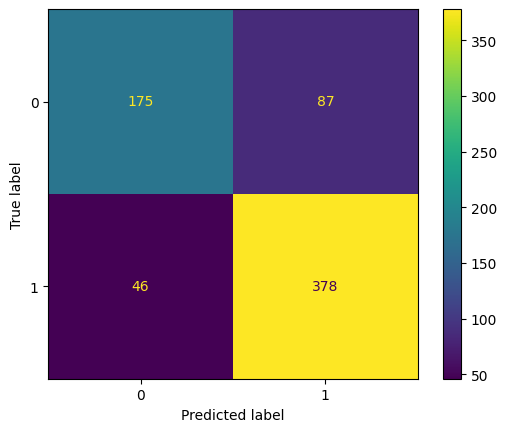

In [ ]:
model = RandomForestClassifier(max_depth= 16, n_estimators=320, max_leaf_nodes= 190, min_samples_leaf= 5)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

The Random Forest greatly improves performance with the tuned hyperparameters; let's see the XGB Boost model.

### XGB Boost - Tuning & Hold-out Validation

In [ ]:
search_space = {
    "n_estimators" : [300,350,400,450,500,550,600],
    "max_depth" : [3,4,5,6,7,8,9],
    "gamma" : [0.001,0.01,0.1],
    "learning_rate" : [0.001,0.01]
}

In [ ]:
GS = GridSearchCV(estimator = XGBClassifier(use_label_encoder=False),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 3,
                  verbose = 4)

In [ ]:
#GS.fit(X_train,y_train)

In [ ]:
#print(GS.best_params_) # to get only the best hyperparameter values that we searched for

- We should uncomment the following lines to enable the tuning.
- The best result we found was:
  gamma = 0.01
  learning_rate = 0.01
  max_depth = 5
  n_estimators = 500

* **Default Hyperparameters**

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       262
           1       0.81      0.86      0.84       424

    accuracy                           0.79       686
   macro avg       0.78      0.77      0.77       686
weighted avg       0.79      0.79      0.79       686



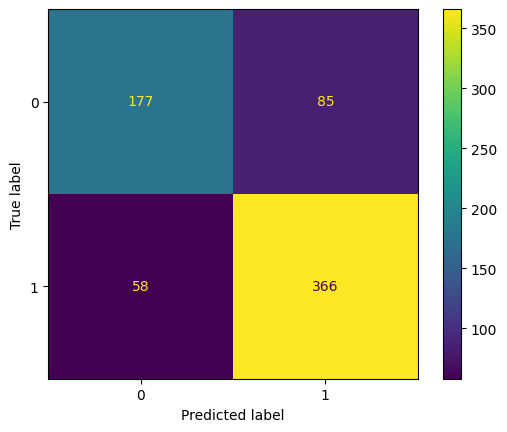

In [ ]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

* **Tuned Hyperparameters**

              precision    recall  f1-score   support

           0       0.79      0.67      0.72       262
           1       0.81      0.89      0.85       424

    accuracy                           0.80       686
   macro avg       0.80      0.78      0.79       686
weighted avg       0.80      0.80      0.80       686



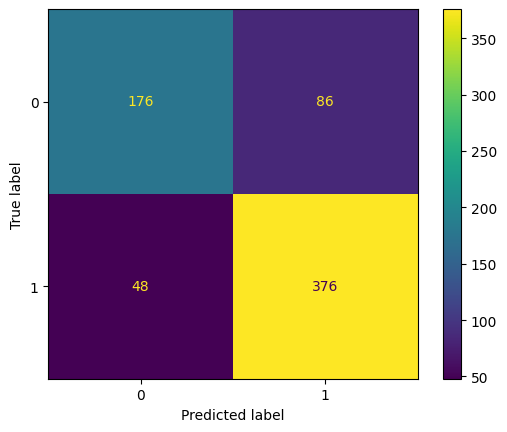

In [ ]:
model = XGBClassifier(gamma=0.01,learning_rate=0.01, max_depth=5, n_estimators=500)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

The model does not improve notably. However, it does improve compared to the Random Forest.

### Creating a pipeline for the XGB Boost model

In [ ]:
pipe_X = pipe_knock_df.drop('Team1_Result',axis=1)
pipe_y = pipe_knock_df['Team1_Result']
pipe_knock = make_pipeline(column_trans,StandardScaler(with_mean=False),XGBClassifier(gamma=0.01,learning_rate=0.01, max_depth=5, n_estimators=500))
pipe_knock.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=No...
                               feature_types=None, gamma=0.01, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=500, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
joblib.dump(pipe_knock,"/content/drive/MyDrive/BigData/knockout_stage_prediction.pkl")

['/content/drive/MyDrive/BigData/knockout_stage_prediction.pkl']